In [1]:
import pathlib
import PIL.Image

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [3]:
loc="C:\\Users\\aryan\\Documents\\Jupyter\\dataset"

In [4]:
loc = pathlib.Path(loc)
loc

WindowsPath('C:/Users/aryan/Documents/Jupyter/dataset')

In [5]:
len(list(loc.glob('*/*.jpg')))

23

In [6]:
len(list(loc.glob('*/*.png')))

11

In [7]:
len(list(loc.glob('*/*.jpeg')))

64

In [8]:
normal=list(loc.glob('normal/*'))
covid=list(loc.glob('covid/*'))

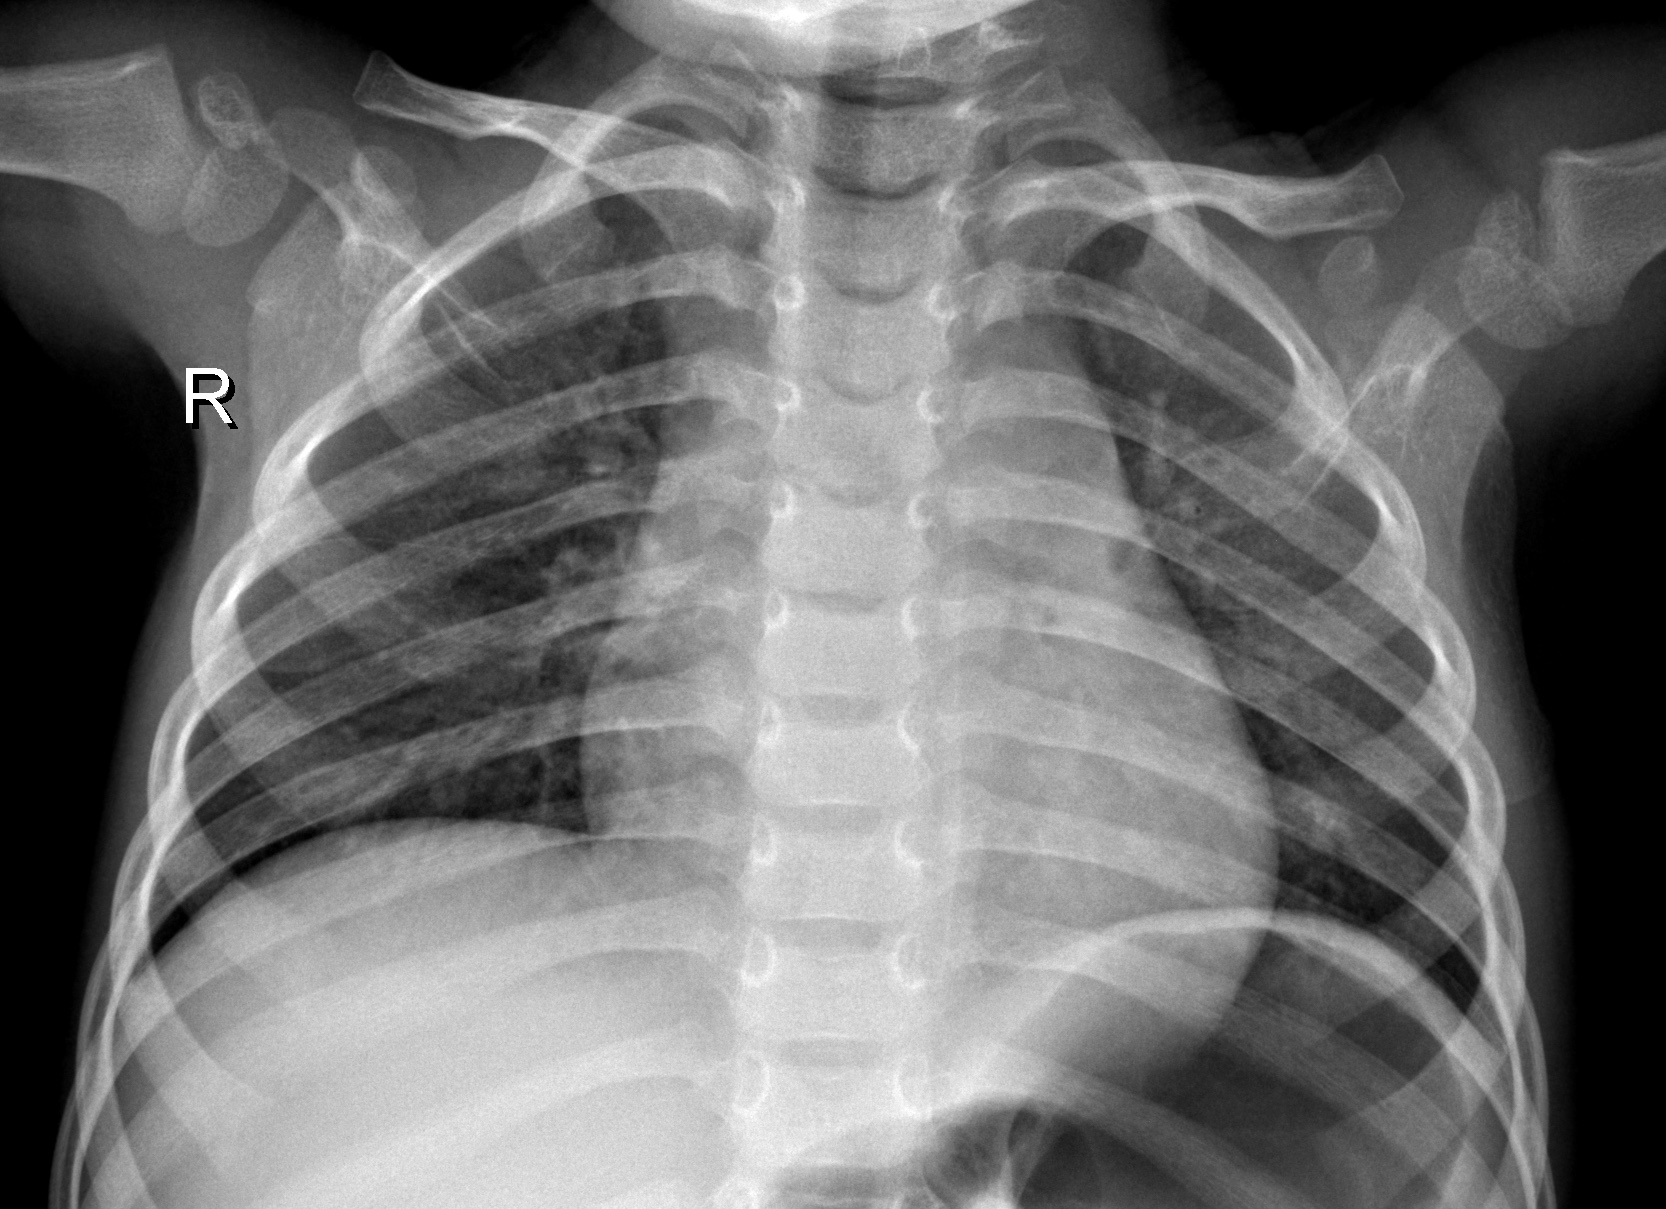

<Figure size 360x360 with 0 Axes>

In [9]:
plt.figure(figsize=(5,5))
PIL.Image.open((normal[1]))

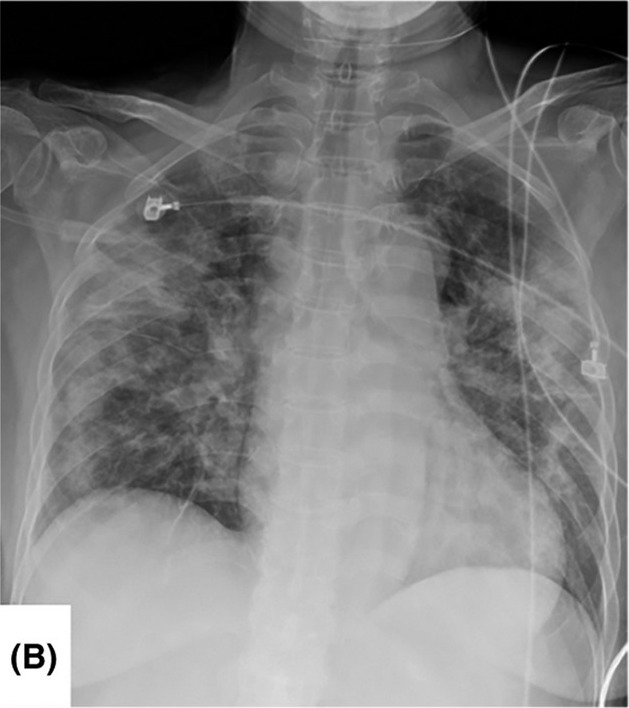

In [10]:
PIL.Image.open(covid[1])

In [32]:
loc_dict={
    'normalxray':list(loc.glob('normalxray/*')),
    'covidxray' :list(loc.glob('covidxray/*')),
    'normalct'  :list(loc.glob('normalct/*')),
    'covidct'   :list(loc.glob('covidct/*'))
}

In [33]:
label_dict={
    'normalxray':0,
    'covidxray' :1,
    'normalct'  :0,
    'covidct'   :1
}

In [35]:
x=cv2.imread(str(loc_dict['normalct'][2]))
x

array([[[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [77, 77, 77]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [77, 77, 77]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)

In [36]:
x.shape

(192, 262, 3)

In [37]:
x=cv2.resize(x,(180,180))

In [38]:
x.shape

(180, 180, 3)

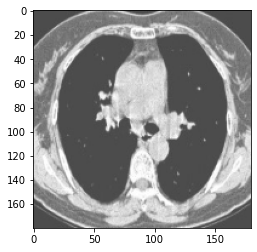

In [39]:
plt.imshow(x)

In [40]:
for x,y in loc_dict.items():
    print(x)
    print(len(y))

normalxray
28
covidxray
70
normalct
397
covidct
349


In [41]:
x,y=[],[]
for res,xray in loc_dict.items():
    for image in xray:
        img=cv2.imread(str(image))
        x.append(cv2.resize(img,(28,28)))
        y.append(label_dict[res])
        

In [42]:
x=np.array(x)
y=np.array(y)

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=5,test_size=0.1)

In [44]:
xtrain=xtrain/255
xtest=xtest/255

In [45]:
xtrain.shape

(759, 28, 28, 3)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

                                      USING ANN

In [47]:
ann=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                      keras.layers.Flatten(),
                      keras.layers.Dropout(0.2),
                      keras.layers.BatchNormalization(),
                      keras.layers.Dense(50,activation='sigmoid'),
                      keras.layers.Dense(5,activation='sigmoid'),
                      keras.layers.Dense(1,activation='sigmoid')])
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
ann.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
24/24 [==============================] - 4s 107ms/step - loss: 0.6386 - accuracy: 0.6893
Epoch 2/5
24/24 [==============================] - 3s 108ms/step - loss: 0.5818 - accuracy: 0.7607
Epoch 3/5
24/24 [==============================] - 3s 106ms/step - loss: 0.5621 - accuracy: 0.7820
Epoch 4/5
24/24 [==============================] - 3s 106ms/step - loss: 0.5376 - accuracy: 0.7957
Epoch 5/5
24/24 [==============================] - 3s 108ms/step - loss: 0.5044 - accuracy: 0.8422


In [49]:
ann.evaluate(xtest,ytest)

3/3 [==============================] - 0s 13ms/step - loss: 0.6177 - accuracy: 0.7176


[0.6176985502243042, 0.7176470756530762]

In [50]:
pred=ann.predict(xtest)

<AxesSubplot:>

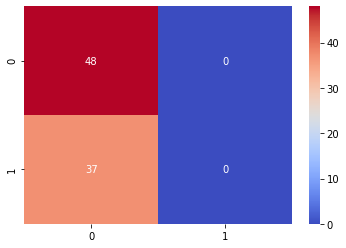

In [51]:
sns.heatmap(tf.math.confusion_matrix(ytest,pred),annot=True,cmap='coolwarm',fmt='d')

In [52]:
pred1=ann.predict(xtrain)

<AxesSubplot:>

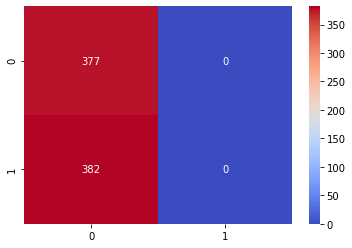

In [53]:
sns.heatmap(tf.math.confusion_matrix(ytrain,pred1),annot=True,cmap='coolwarm',fmt='d')

                                            "USING CNN"

In [117]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32,input_shape=(28,28,3), kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='relu')
])

In [118]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [119]:
cnn.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
24/24 [==============================] - 2s 21ms/step - loss: 0.8349 - accuracy: 0.5370
Epoch 2/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6857 - accuracy: 0.5533
Epoch 3/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6808 - accuracy: 0.5655
Epoch 4/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6766 - accuracy: 0.5513
Epoch 5/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6537 - accuracy: 0.6021
Epoch 6/20
24/24 [==============================] - 1s 21ms/step - loss: 0.6135 - accuracy: 0.6820
Epoch 7/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6042 - accuracy: 0.6639
Epoch 8/20
24/24 [==============================] - 0s 20ms/step - loss: 0.7460 - accuracy: 0.5263
Epoch 9/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6433 - accuracy: 0.6078
Epoch 10/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6086 - accuracy: 0.6537
Epoch 11/